In [6]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# %conda install pandas

In [8]:
import pandas

In [62]:
train_x = np.linspace(1.0, 10.0, num = 100)[:, np.newaxis]
train_y = np.sin(train_x) + 0.1* np.power(train_x, 2) + 0.5 + np.random.randn(100, 1)

with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]
    

In [10]:
# Task 1
# get Euclidean distance

def getEucDist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def getEucDistAll(vecToClass, vecs, resp):
    arr = [] 
    for idx, val in enumerate(vecs):
        arr.append([getEucDist(val, vecToClass), resp[idx][0]])
    arr.sort(key=lambda x: x[0])
    ed = np.asarray(arr)
    return ed

def getVote(sortedResp, K):
    p1 = np.count_nonzero(sortedResp[0:K])/K
    return p1


In [11]:
ed = getEucDistAll(x_eval[1], x, t)
getVote(ed[:,1], 300)

0.31666666666666665

<function matplotlib.pyplot.show>

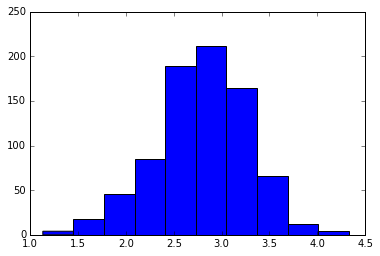

In [12]:
plt.hist(ed[:,0])
plt.show

In [40]:
np.count_nonzero(ed[0:1,1])

0

### Task 2

In [50]:
Nnei = [5, 50, 100, 200, 400, 800]
kval = [1, 3, 5, 7, 21, 101, 401]

In [52]:
x[0:40]

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.08, ...,  0.13,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.11,  0.2 ,  0.24, ...,  0.55,  0.46,  0.  ],
       [ 0.19,  0.42,  0.42, ...,  0.52,  0.22,  0.  ],
       [ 0.  ,  0.  ,  0.02, ...,  0.62,  0.17,  0.  ]])

In [193]:
def getResid(n, k, x_val, tr, resp):
    arr_comp = []
    for idx, im in enumerate(x_val):
        ed_iter = getEucDistAll(im, tr[0:n], resp[0:n])
        arr_comp.append([resp[idx][0] , getVote(ed_iter[:,1], k ) > 0.49 ])
    return arr_comp


In [194]:
df = pandas.DataFrame(res)
df.columns = ['resp', 'forec']

In [205]:
def getPrecRecall(n, k, x_val, tr, resp):
    res = getResid(n, k, x_val, tr, resp)
    df = pandas.DataFrame(res)
    df.columns = ['resp', 'forec']
    
    tps = len(df.ix[(df['resp']== 1) & (df['forec'] == 1) ])
    fps = len(df.ix[(df['resp']== 0) & (df['forec'] == 1) ])
    tns = len(df.ix[(df['resp']== 0) & (df['forec'] == 0) ])
    fns = len(df.ix[(df['resp']== 1) & (df['forec'] == 0) ])
    
    prec = tps/(tps + fps)
    reca = tps/(tps + fns)
    f1 = 2*(prec*reca)/(prec + reca)
    
    arr_ret = pandas.DataFrame.transpose(pandas.DataFrame([n, k, fps + fps , prec, reca, f1 ]))
    arr_ret.columns = ['n', 'k', 'val_err', 'prec', 'reca', 'f1']
    return arr_ret
    

In [204]:
df = getPrecRecall(800, 1, x_eval, x, t)
for ks in kval:
    df.append(getPrecRecall(800, ks, x_eval, x, t))
df

,n,k,prec,reca,f1
0,800,1,0.479167,0.46,0.469388


In [215]:
df_task1 = getPrecRecall(5, 1, x_eval, x, t).append(getPrecRecall(50, 1, x_eval, x, t)).append(getPrecRecall(100, 1, x_eval, x, t)).append(getPrecRecall(200, 1, x_eval, x, t)).append(getPrecRecall(400, 1, x_eval, x, t)).append(getPrecRecall(800, 1, x_eval, x, t))
df_task1



,n,k,val_err,prec,reca,f1
0,5,1,250,0.481328,0.580,0.526077
0,50,1,206,0.474490,0.465,0.469697
0,100,1,210,0.477612,0.480,0.478803
0,200,1,212,0.477833,0.485,0.481390
0,400,1,208,0.477387,0.475,0.476190
0,800,1,200,0.479167,0.460,0.469388


In [216]:
df_task2 = getPrecRecall(800, 1, x_eval, x, t).append(getPrecRecall(800, 3, x_eval, x, t)).append(getPrecRecall(800, 5, x_eval, x, t)).append(getPrecRecall(800, 7, x_eval, x, t)).append(getPrecRecall(800, 21, x_eval, x, t)).append(getPrecRecall(800, 101, x_eval, x, t)).append(getPrecRecall(800, 401, x_eval, x, t))

df_task2

,n,k,val_err,prec,reca,f1
0,800,1,200,0.479167,0.460,0.469388
0,800,3,208,0.480000,0.480,0.480000
0,800,5,210,0.475000,0.475,0.475000
0,800,7,208,0.477387,0.475,0.476190
0,800,21,210,0.477612,0.480,0.478803
0,800,101,210,0.467005,0.460,0.463476
0,800,401,196,0.494845,0.480,0.487310


### Task 3

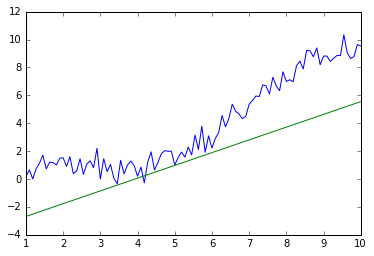

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_descent import gradient_descent


train_x = np.linspace (1.0 , 10.0 , num =100) [:, np.newaxis]
train_y = np.sin( train_x ) + np.power ( train_x , 2) * 0.1 + np.random .randn (100 , 1) * 0.5
yd = np.shape(train_y)
T = yd[0]
eta = 0.001
plt.plot(train_x, train_y)
w = gradient_descent(train_x, train_y, eta)
train_y_p = np.zeros(T, dtype = float)
for i in range(0, T):
    train_y_p[i] = w[0] + w[1] * train_x[i]
plt.plot(train_x, train_y_p)
plt.show()


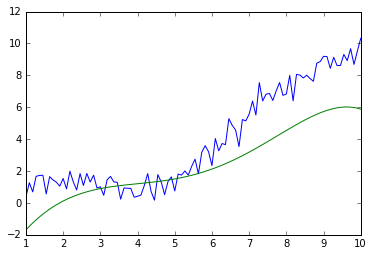

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_descent import gradient_descent


train_x_1 = np.linspace (1.0 , 10.0 , num =100) [:, np. newaxis]
train_x_2 = [x**2 for x in train_x_1]
train_x_3 = [x**3 for x in train_x_1]
train_x_4 = [x**4 for x in train_x_1]
train_x_5 = [x**5 for x in train_x_1]

train_mean = np.zeros(5)
train_mean[0] = np.mean(train_x_1)
train_mean[1] = np.mean(train_x_2)
train_mean[2] = np.mean(train_x_3)
train_mean[3] = np.mean(train_x_4)
train_mean[4] = np.mean(train_x_5)

train_std = np.zeros(5)
train_std[0] = np.std(train_x_1)
train_std[1] = np.std(train_x_2)
train_std[2] = np.std(train_x_3)
train_std[3] = np.std(train_x_4)
train_std[4] = np.std(train_x_5)

train_x_1_n = [(x-train_mean[0])/train_std[0] for x in train_x_1]
train_x_2_n = [(x-train_mean[1])/train_std[1] for x in train_x_2]
train_x_3_n = [(x-train_mean[2])/train_std[2] for x in train_x_3]
train_x_4_n = [(x-train_mean[3])/train_std[3] for x in train_x_4]
train_x_5_n = [(x-train_mean[4])/train_std[4] for x in train_x_5]

train_x = np.zeros((100,5))

train_x[:, 0] = train_x_1_n
train_x[:, 1] = train_x_2_n
train_x[:, 2] = train_x_3_n
train_x[:, 3] = train_x_4_n
train_x[:, 4] = train_x_5_n

train_y = np.sin( train_x_1 ) + np.power ( train_x_1 , 2) * 0.1 + np.random .randn (100 , 1) * 0.5
eta = 0.001
plt.plot(train_x_1, train_y)
w = gradient_descent(train_x, train_y, eta)
train_y_p = np.zeros(100)
for i in range(0, 100):
    train_y_p[i] = w[0]
    for j in range(1, 6):
        train_y_p[i] = train_y_p[i] + w[j] * ((train_x_1[i] ** j - train_mean[j-1])/train_std[j-1])

plt.plot(train_x_1, train_y_p)
plt.show()


In [55]:
train_x

array([[ -1.71481604e+00,  -1.22431013e+00,  -9.63856800e-01,
         -8.12461534e-01,  -7.14021393e-01],
       [ -1.68017329e+00,  -1.21787007e+00,  -9.62826365e-01,
         -8.12311164e-01,  -7.14000732e-01],
       [ -1.64553055e+00,  -1.21087001e+00,  -9.61609049e-01,
         -8.12118113e-01,  -7.13971908e-01],
       [ -1.61088780e+00,  -1.20330995e+00,  -9.60189281e-01,
         -8.11874980e-01,  -7.13932711e-01],
       [ -1.57624505e+00,  -1.19518989e+00,  -9.58551485e-01,
         -8.11573771e-01,  -7.13880564e-01],
       [ -1.54160230e+00,  -1.18650981e+00,  -9.56680090e-01,
         -8.11205901e-01,  -7.13812494e-01],
       [ -1.50695955e+00,  -1.17726974e+00,  -9.54559522e-01,
         -8.10762193e-01,  -7.13725104e-01],
       [ -1.47231680e+00,  -1.16746966e+00,  -9.52174206e-01,
         -8.10232875e-01,  -7.13614547e-01],
       [ -1.43767406e+00,  -1.15710957e+00,  -9.49508571e-01,
         -8.09607588e-01,  -7.13476494e-01],
       [ -1.40303131e+00,  -1.1461894

In [ ]:
train_y

#### Task 5

In [1]:
import numpy as np

def gradient_descent(x, y, eta):
    xd = np.shape(x)
    yd = np.shape(y)
    N = xd[1]
    T = yd[0]
    w = np.random.rand(N+1)
    delta = np.zeros(N+1, dtype=float)
    y_hat = np.zeros(T, dtype=float)
    NUM_IT = 10000
    for l in range(0, NUM_IT):
        for k in range(0, T):
            y_hat[k] = w[0]
            for i in range(1, N + 1):
                y_hat[k] = y_hat[k] + w[i] * x[k, i-1]
        for k in range(0, T):            
            delta[0] = delta[0] + (2 * (y[k,0] - y_hat[k]))/T             
        for i in range(1, N+1):
            for k in range(0, T):           
                delta[i] = delta[i] + (2 * (y[k,0] - y_hat[k])*x[k, i-1])/T            
        for i in range(0, N + 1):
            w[i] = w[i] + eta * delta[i]
    return w      

In [17]:
N = [100, 200, 400, 800]

In [66]:
gg = gradient_descent(x[1:100], t[1:100], 0.1 )

In [95]:
gg

array([ 0.48688206, -0.34627414, -0.2800533 , -0.2821349 , -0.45484186,
       -0.06446944,  0.08900986,  0.97272394,  0.08415552,  0.77093833,
       -1.06715617,  0.87990296,  0.12225419, -0.33719893, -0.15480025,
       -0.55843005, -0.5732277 ,  0.60405835,  0.12262442,  0.45542859,
        0.72172368,  0.35992743, -0.48357312,  0.12174477,  0.23074797,
       -0.53714658,  0.17680842, -0.02498379, -0.97852981,  0.12085372,
       -0.42486535,  0.19918381, -1.23904688, -0.13645888,  0.32066581,
        0.22055352,  0.34302786, -0.61893889,  0.32760934,  0.22526623,
        0.16851561,  0.13565083, -0.32834398, -0.39557582,  0.72364976,
       -0.38273655, -0.29355351, -0.33536141, -0.7525716 , -0.34880453,
        0.29144705, -0.46156574, -0.54931073,  0.57827972,  0.46480996,
        0.78726126, -0.73209277, -0.4129305 , -0.66777045,  0.44770353,
       -0.70675456, -0.0351882 ,  0.02276865,  0.83969786,  1.18069341])

In [96]:
gg[0:6]

array([ 0.48688206, -0.34627414, -0.2800533 , -0.2821349 , -0.45484186,
       -0.06446944])

In [97]:
def getLinForecast(linParam, x):
    # First element is the intercept
    inter = linParam[0]
    return inter + np.dot(linParam[1:len(linParam)], x)
    

In [94]:
getLinForecast(gg, x[3])

-0.18599429869073092

In [121]:
def getValErr(x_eval, N, mod):
    val_error = []
    for idx, val in enumerate(x_eval[1:N]):
        resid = getLinForecast(mod, x_eval[idx]) - t_eval[idx]
        val_error.append( (resid[0])**2 )

    return sum(val_error)/(2*len(val_error))


In [129]:
getValErr(x_eval, 100, gg)

0.54789000463233895